In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset

main_df=pd.merge(city_data,ride_data,how='inner',on=["city","city"])


# Display the data table for preview
main_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
grouped_main_df=main_df.groupby(['city','type'])

averagefare_per_city=main_df.groupby(["city",'type']).fare.mean()
averagefare_per_city

totalrides_per_city=main_df.groupby(["city","type"]).ride_id.count()
totalrides_per_city

totaldrivers_per_city=main_df.groupby(["city",'type']).driver_count.mean()
totaldrivers_per_city

submain_df=pd.DataFrame({
    'Average Fare':averagefare_per_city,
    'Total Rides':totalrides_per_city,
    'Total Drivers':totaldrivers_per_city
})
submain_df=submain_df.reset_index()
submain_df.head()

,city,type,Average Fare,Total Rides,Total Drivers
0,Amandaburgh,Urban,24.641667,18,12
1,Barajasview,Urban,25.332273,22,26
2,Barronchester,Suburban,36.422500,16,11
3,Bethanyland,Suburban,32.956111,18,22
4,Bradshawfurt,Rural,40.064000,10,7


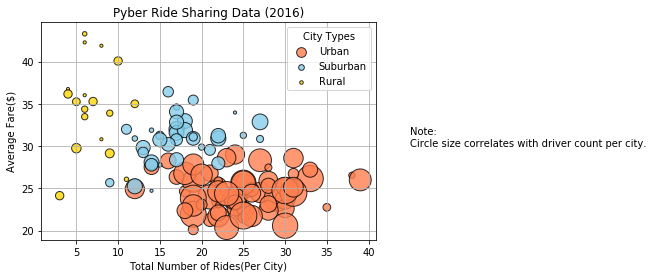

In [3]:
# colors={'Urban':'coral','Suburban':'skyblue','Rural':'gold'}
# pyber_bubble= plt.scatter(x=submain_df['Total Rides'], 
#                           y=submain_df['Average Fare'],
#                           s=[8*n for n in submain_df["Total Drivers"]],
#                           c=submain_df['type'].apply(lambda x: colors[x]),alpha=.8,label=['Urban','Suburban','Rural']
                          
#                           ,edgecolors='black', marker='o'
                          
#                          )
# plt.grid()
# plt.title("Pyber Ride Sharing Data (2016)")
# plt.xlabel("Total Number of Rides(Per City)")
# plt.ylabel("Average Fare($)")
# city_types=['Urban','Suburban','Rural']

# legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
# #legend.scatterpoints()
# # Adjust the legend 
# legend.legendHandles[0]._sizes = [30]
# #legend.legendHandles[1]._sizes = [30]
# #legend.legendHandles[2]._sizes = [30]

# ax = plt.gca().add_artist(legend)




urban_df = main_df.loc[main_df['type']=="Urban"].groupby(["city"])

x_urban_norides=urban_df['ride_id'].count()
y_urban_avgfare=urban_df['fare'].mean()
z_urban_totaldrivers=urban_df['driver_count'].mean()

suburban_df = main_df.loc[main_df['type']=="Suburban"].groupby(["city"])

x_suburban_norides=suburban_df['ride_id'].count()
y_suburban_avgfare=suburban_df['fare'].mean()
z_suburban_totaldrivers=suburban_df['driver_count'].mean()

rural_df = main_df.loc[main_df['type']=="Rural"].groupby(["city"])

x_rural_norides=rural_df['ride_id'].count()
y_rural_avgfare=rural_df['fare'].mean()
z_rural_totaldrivers=rural_df['driver_count'].mean()


plt.scatter(urban_df['ride_id'].count(), 
                           urban_df['fare'].mean(),
                           s=urban_df['driver_count'].mean()*10 ,
                           c=['Coral'],alpha=.8,label='Urban',edgecolors='black', marker='o',)
                          
plt.scatter(suburban_df['ride_id'].count(), 
                           suburban_df['fare'].mean(),
                           s=suburban_df['driver_count'].mean()*10 ,
                           c=['skyblue'],alpha=.8,label='Suburban',edgecolors='black', marker='o',)
                          
plt.scatter(rural_df['ride_id'].count(), 
                           rural_df['fare'].mean(),
                           s=rural_df['driver_count'].mean()*10 ,
                           c=['gold'],alpha=.8,label='Rural',edgecolors='black', marker='o',)
                          
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.text(45,30,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend
legend = plt.legend(fontsize = 10, title= "City Types", loc="best",markerscale=0.5) 

# Incorporate a text label regarding circle size
# Save Figure
plt.savefig("Images/scatterplot.png")


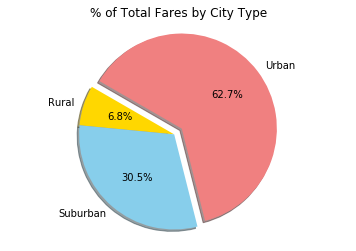

<Figure size 432x288 with 0 Axes>

In [8]:
main_df_grp1=main_df.groupby(['type'])
                                  
tf_percity=main_df_grp1.sum()['fare']
tf_percity

total_fare=main_df.sum()['fare']
total_fare

piechart1_df=pd.DataFrame(tf_percity/total_fare*100)
piechart1_df
pie_types=['Rural','Suburban','Urban']
colors_pie=['gold','skyblue','lightcoral']


plt.title("% of Total Fares by City Type")
plt.pie(x=piechart1_df['fare'], labels=pie_types, explode= [0,0,0.1],colors= colors_pie,
      autopct="%1.1f%%", shadow=True,startangle=150)
plt.axis("equal")
plt.show()
plt.savefig("Images/piechart1")

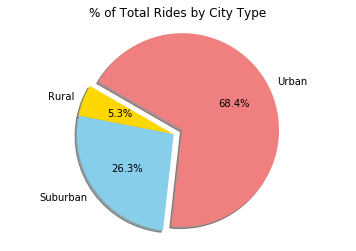

<Figure size 432x288 with 0 Axes>

In [9]:
total_rides=main_df.ride_id.count()
total_rides
type_counts=main_df_grp1.type.value_counts()
type_counts

piechart2_df=pd.DataFrame(type_counts/total_rides*100)
piechart2_df

pie_types_ride=piechart2_df.index.get_values()

plt.title("% of Total Rides by City Type")
plt.pie(piechart2_df, labels=pie_types, explode= [0,0,0.1],colors= colors_pie,
      autopct="%1.1f%%", shadow=True,startangle=150)
plt.axis("equal")
plt.show()
plt.savefig("Images/piechart2.png")

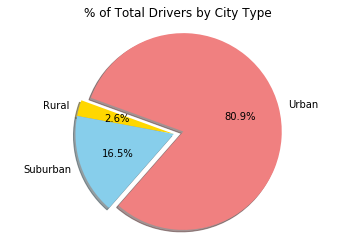

<Figure size 432x288 with 0 Axes>

In [10]:
total_drivers_pertype=main_df.drop_duplicates('city').groupby('type').driver_count.sum()
total_drivers_pertype
total_drivers=main_df.drop_duplicates('city').driver_count.sum()
total_drivers
piechart3_df=total_drivers_pertype/total_drivers*100
piechart3_df

plt.title("% of Total Drivers by City Type")
plt.pie(piechart3_df, labels=pie_types, explode= [0,0,0.1],colors= colors_pie,
      autopct="%1.1f%%", shadow=True,startangle=160)
plt.axis("equal")
plt.show()
plt.savefig("Images/piechart3.png")

In [ ]:
Based on the data it is obvious that there is a higher competition in Urban areas than in Suburban and rural 
As more drivers, more rides and higher fare percentage